# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0      (3.15579864084535, 0.20640824067460714)
1     (1.8351430547168281, 0.3994880097536847)
2     (0.7509754090450433, 0.6869541664259755)
3      (3.734179347003322, 0.1545728653395303)
4    (1.4773741582632989, 0.47774073973255526)
dtype: object

#### Interpret the normaltest results and make your observations.

In [3]:
# Explain the test results here
The first value for each row measures how concentrated the values are around the mean. 
The first value for each row measures how far away the median is from the mean, indicating skewness.

We can see that as both these values are inversely correlated for example 6.72 with 0.034.

SyntaxError: invalid syntax (<ipython-input-3-d031b8d2fc45>, line 2)

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

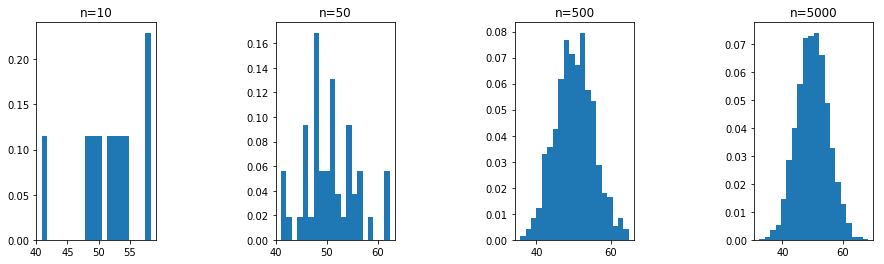

In [4]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [5]:
# Your comment and explanation here
As the number of samples (bins) increases the shape of the probability density distribution tends to a 
normal distribution. The mean of means tends to sigma. 

SyntaxError: invalid syntax (<ipython-input-5-f6fa5dd25ecd>, line 2)

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

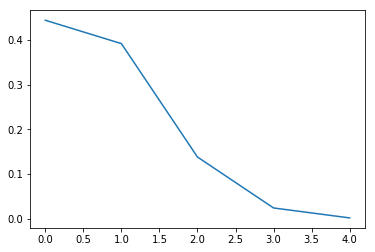

In [6]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [7]:
# Your comment here
The probability of clicking on the add is much higher the lower the number of people.
The probability that 4 people or more have clicked the video is 0.
The probability that 0 people have clicked the video is higher than 0.4.


SyntaxError: invalid syntax (<ipython-input-7-084407ef94c8>, line 2)

#### Now plot PMP with 50, 500, and 5000 visitors.

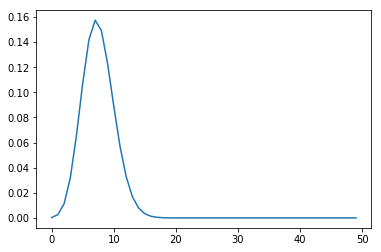

=====


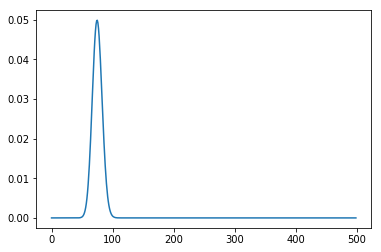

=====


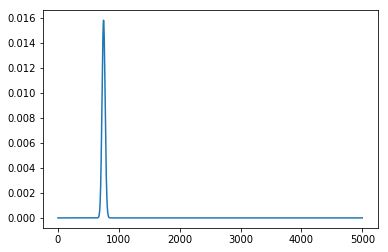

In [8]:
# Your code here
from scipy.stats import binom

n, p = 50, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

print("=====")

n, p = 500, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

print("=====")

n, p = 5000, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [9]:
# Your comment here
The more samples that are taken, the clearer it is to see where the mean lies and the closer the probability of each
random variable that tends to 0. 
Also, as sample size increases, the data becomes less evenly distributed, so there is less variation.
However, the area below each curve is 1. 

SyntaxError: invalid syntax (<ipython-input-9-3abd8c6f759b>, line 2)

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [10]:
# Your comment here
The poisson distribution models discrete values where we do not know how many sample tests are taken but we do 
know where the mean of these test lies.

For example we know that on average 3 cars pass a point every hour but we do not 
know the number of cars that pass overall.

SyntaxError: invalid syntax (<ipython-input-10-1dbd6268cb46>, line 2)

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

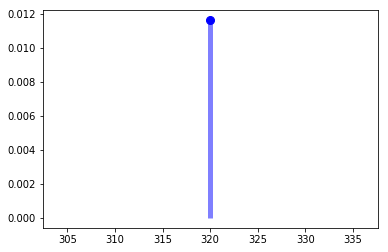

In [11]:
# Your code here
mu = 300
x = 320
fig, ax = plt.subplots(1, 1)

#rv = poisson(mu)
#ax.vlines(x, 0, rv.pmf(x))

ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

plt.show()


#### What is the probability of getting 60 visits?

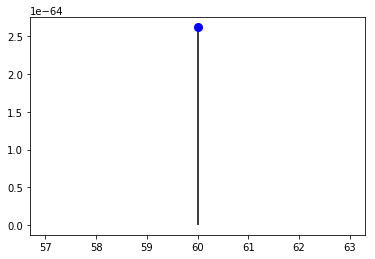

In [18]:
# Your code here
mu = 300
x = 60
fig, ax = plt.subplots(1, 1)

ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu))

plt.show()


#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

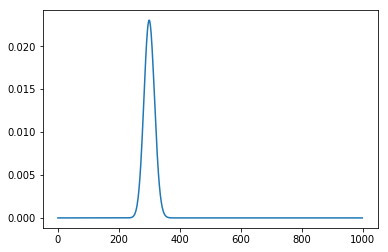

In [14]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)